In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv("./Dataset/Linear_X_Train.csv").values
Y = pd.read_csv("./Dataset/Linear_Y_Train.csv").values

In [4]:
print(X.shape)
print(Y.shape)

(3750, 1)
(3750, 1)


In [6]:
print(X)
print(Y)

[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]
[[-9.11011171e-02]
 [-5.34677208e+01]
 [ 7.54570088e+01]
 ...
 [-3.49832749e+01]
 [ 1.45206092e+02]
 [-1.71244939e+01]]


In [8]:
u = X.mean()
std = X.std()
X = (X-u)/std

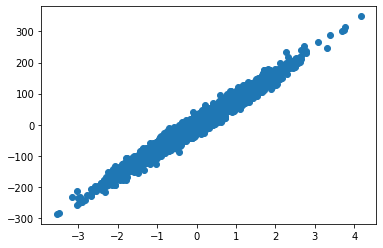

In [9]:
plt.scatter(X,Y)
plt.show()

In [14]:
def yhat(theta,X):
    return theta[0] + theta[1]*X
def error(X,Y,theta):
    Y_ = yhat(theta,X)
    e = np.sum((Y_-Y)**2)
    m = X.shape[0]
    return e/m
def getGrad(X,Y,theta):
    grad = np.ones((2,))
    Y_ = yhat(theta,X)
    grad[0] = 2*np.sum(Y_ - Y)
    grad[1] = 2*np.sum( (Y_ - Y)*X)
    m = X.shape[0]
    return grad/m
def gradientDescent(X,Y,lr=0.01):
    theta = np.zeros((2,))
    error_list = []
    for i in range(400):
        grad = getGrad(X,Y,theta)
        theta = theta - lr*grad
        e = error(X,Y,theta)
        error_list.append(e)
        
    return theta,error_list
    
    

In [15]:
theta,err_list = gradientDescent(X,Y)

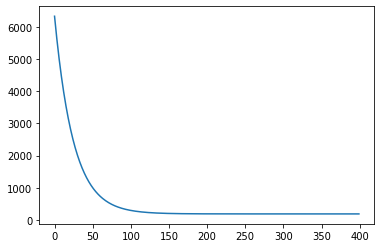

In [16]:
plt.plot(err_list)
plt.show()

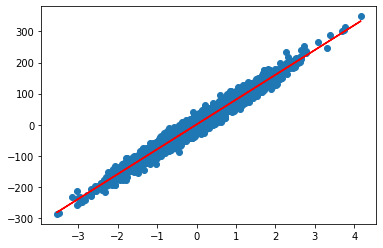

In [17]:
plt.scatter(X,Y)
Y_ = y_hat(theta,X)
plt.plot(X,Y_,color='red')
plt.show()

In [32]:
X_test = pd.read_csv("./Dataset/Linear_X_Test.csv").values

In [33]:
X_test.shape

(1250, 1)

In [56]:
Y_pred = yhat(theta,X_test)
type(Y_pred)
print(Y_pred.shape)

(1250, 1)


In [84]:
Y_pred1 = pd.DataFrame(Y_pred,columns = ["y"])


In [96]:
Y_pred1.to_csv("sol.csv",index = False)

In [97]:
df1 = pd.read_csv("./sol.csv")
print(df1.shape)
print(df1.head(5))

(1250, 1)
            y
0 -149.328456
1  -68.735498
2 -201.429893
3  221.171682
4   47.893350
